# BÀI THỰC HÀNH TUẦN 4 - LOGISTIC REGRESSION VÀ K-NN BINARY CLASSIFICATION

**Họ và tên:** Bùi Quang Chiến
**Mã sinh viên:** 23001837 



---

## PHẦN A: PHƯƠNG PHÁP K-NN CHO PHÂN LOẠI NHỊ PHÂN

### 1. Import thư viện cần thiết

In [35]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn import linear_model
import time

# Thiết lập để hiển thị đồ thị trong notebook
%matplotlib inline

# Thiết lập seed để kết quả có thể tái tạo
np.random.seed(2)

print("Đã import thư viện thành công!")

Đã import thư viện thành công!


### 2. Xây dựng hàm tính khoảng cách và K-NN classifier

K-NN cho phân loại nhị phân hoạt động như sau:
- Tính khoảng cách từ điểm cần dự đoán đến tất cả điểm trong tập training
- Chọn K điểm gần nhất
- Lấy trung bình nhãn của K điểm này
- Nếu trung bình >= 0.5 → dự đoán là lớp 1, ngược lại là lớp 0

In [36]:
# Hàm tính khoảng cách cho dữ liệu 1 chiều
def distance(array, value):
    """Tính khoảng cách Euclidean từ value đến các phần tử trong array"""
    array = np.array(array)
    return np.absolute(array - value)

# Hàm dự đoán sử dụng K-NN
def knn_predict(X_train, y_train, x_test, k):
    """
    Dự đoán nhãn cho x_test dựa trên K láng giềng gần nhất
    
    Parameters:
    - X_train: dữ liệu training
    - y_train: nhãn của dữ liệu training
    - x_test: điểm cần dự đoán
    - k: số láng giềng
    
    Returns:
    - y_pred: nhãn dự đoán (0 hoặc 1)
    """
    # Tính khoảng cách từ x_test đến tất cả điểm trong X_train
    distances = distance(X_train, x_test)
    
    # Tìm chỉ số của k điểm gần nhất
    k_nearest_indices = np.argsort(distances)[:k]
    
    # Lấy nhãn của k điểm gần nhất
    k_nearest_labels = y_train[k_nearest_indices]
    
    # Tính trung bình và quyết định nhãn
    avg = np.mean(k_nearest_labels)
    if avg >= 0.5:
        return 1
    else:
        return 0

print("Đã định nghĩa các hàm K-NN!")

Đã định nghĩa các hàm K-NN!


### 3. Ví dụ A.1: Dự đoán kết quả thi của sinh viên bằng K-NN

**Bài toán:** Có 20 sinh viên dành thời gian từ 0-6 giờ để ôn thi. Dựa vào số giờ học, dự đoán sinh viên có vượt qua kỳ thi hay không?

- **Đầu vào (X):** Số giờ học
- **Đầu ra (y):** 0 = Trượt, 1 = Đậu

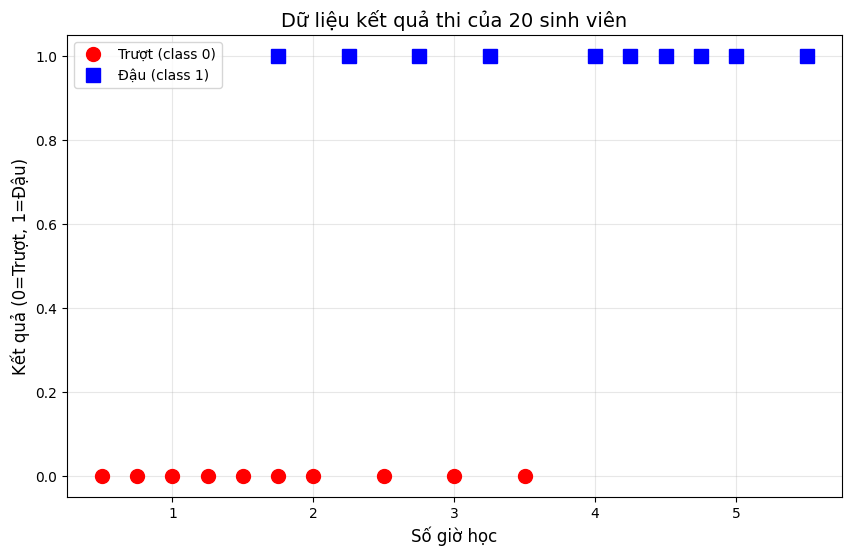

Số lượng sinh viên: 20
Số sinh viên đậu: 10
Số sinh viên trượt: 10


In [37]:
# Tạo dữ liệu training
X_train = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
                    2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y_train = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Hiển thị dữ liệu
plt.figure(figsize=(10, 6))
plt.plot(X_train[y_train == 0], y_train[y_train == 0], 'ro', markersize=10, label='Trượt (class 0)')
plt.plot(X_train[y_train == 1], y_train[y_train == 1], 'bs', markersize=10, label='Đậu (class 1)')
plt.xlabel('Số giờ học', fontsize=12)
plt.ylabel('Kết quả (0=Trượt, 1=Đậu)', fontsize=12)
plt.title('Dữ liệu kết quả thi của 20 sinh viên', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Số lượng sinh viên: {len(X_train)}")
print(f"Số sinh viên đậu: {np.sum(y_train == 1)}")
print(f"Số sinh viên trượt: {np.sum(y_train == 0)}")

In [38]:
# Dự đoán cho 5 sinh viên mới với K = 3, 4, 5
new_students = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
student_ids = [21, 22, 23, 24, 25]

print("=" * 70)
print("DỰ ĐOÁN KẾT QUẢ THI CHO 5 SINH VIÊN MỚI")
print("=" * 70)

for k in [3, 4, 5]:
    print(f"\n{'*' * 70}")
    print(f"Kết quả với K = {k}:")
    print(f"{'*' * 70}")
    print(f"{'ID':<10} {'Giờ học':<15} {'Dự đoán':<15} {'Kết quả'}")
    print("-" * 70)
    
    for student_id, hours in zip(student_ids, new_students):
        prediction = knn_predict(X_train, y_train, hours, k)
        result = "ĐẬU" if prediction == 1 else "TRƯỢT"
        print(f"{student_id:<10} {hours:<15.2f} {prediction:<15} {result}")

print("\n" + "=" * 70)

DỰ ĐOÁN KẾT QUẢ THI CHO 5 SINH VIÊN MỚI

**********************************************************************
Kết quả với K = 3:
**********************************************************************
ID         Giờ học         Dự đoán         Kết quả
----------------------------------------------------------------------
21         2.45            1               ĐẬU
22         1.85            0               TRƯỢT
23         3.75            1               ĐẬU
24         3.21            0               TRƯỢT
25         4.05            1               ĐẬU

**********************************************************************
Kết quả với K = 4:
**********************************************************************
ID         Giờ học         Dự đoán         Kết quả
----------------------------------------------------------------------
21         2.45            1               ĐẬU
22         1.85            0               TRƯỢT
23         3.75            1               ĐẬU
24        

---

## PHẦN B: PHƯƠNG PHÁP HỒI QUY LOGISTIC

### 1. Xây dựng hàm Sigmoid và Logistic Regression

Hàm sigmoid chuyển đổi giá trị thực thành xác suất trong khoảng (0, 1):

$$g(z) = \frac{1}{1 + e^{-z}}$$

Thuật toán Stochastic Gradient Descent (SGD) để tìm tham số tối ưu:

$$w_{new} = w_{old} + \eta \cdot (y_i - g(w^T x_i)) \cdot x_i$$

In [39]:
def sigmoid(s):
    """Hàm sigmoid chuyển đổi giá trị thực sang xác suất (0, 1)"""
    return 1 / (1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    """
    Huấn luyện mô hình Logistic Regression bằng Stochastic Gradient Descent
    
    Parameters:
    - X: ma trận dữ liệu (đã thêm cột 1 ở đầu)
    - y: vector nhãn
    - w_init: giá trị khởi tạo cho tham số w
    - eta: learning rate
    - tol: ngưỡng hội tụ
    - max_count: số vòng lặp tối đa
    
    Returns:
    - w: danh sách các giá trị w qua mỗi vòng lặp
    """
    w = [w_init]
    N = X.shape[1]  # số lượng mẫu dữ liệu
    d = X.shape[0]  # số chiều dữ liệu
    count = 0
    check_w_after = 20
    
    while count < max_count:
        # Trộn ngẫu nhiên dữ liệu (stochastic)
        mix_id = np.random.permutation(N)
        
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            
            # Cập nhật trọng số
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            
            # Kiểm tra điều kiện dừng
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            
            w.append(w_new)
    
    return w

print("Đã định nghĩa hàm sigmoid và logistic regression!")

Đã định nghĩa hàm sigmoid và logistic regression!


### 2. Ví dụ B.1: Áp dụng Logistic Regression cho dữ liệu sinh viên

Sử dụng lại dữ liệu từ ví dụ A.1 nhưng áp dụng mô hình Logistic Regression

In [40]:
# Chuẩn bị dữ liệu (thêm cột 1 cho bias term)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
               2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Thêm cột 1 (bias term) vào đầu
X = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)

print(f"Shape của X sau khi thêm bias: {X.shape}")
print(f"Shape của y: {y.shape}")

Shape của X sau khi thêm bias: (2, 20)
Shape của y: (20,)


In [41]:
# Huấn luyện mô hình
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1)

print("Bắt đầu huấn luyện mô hình Logistic Regression...")
w = logistic_sigmoid_regression(X, y, w_init, eta)

# In kết quả
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0 / w1

print(f"\nKết quả huấn luyện:")
print(f"  w0 (bias) = {w0:.4f}")
print(f"  w1 (hệ số) = {w1:.4f}")
print(f"  Ngưỡng quyết định: {threshold:.2f} giờ")
print(f"  Số vòng lặp: {len(w)}")

Bắt đầu huấn luyện mô hình Logistic Regression...

Kết quả huấn luyện:
  w0 (bias) = -4.0927
  w1 (hệ số) = 1.5528
  Ngưỡng quyết định: 2.64 giờ
  Số vòng lặp: 10001


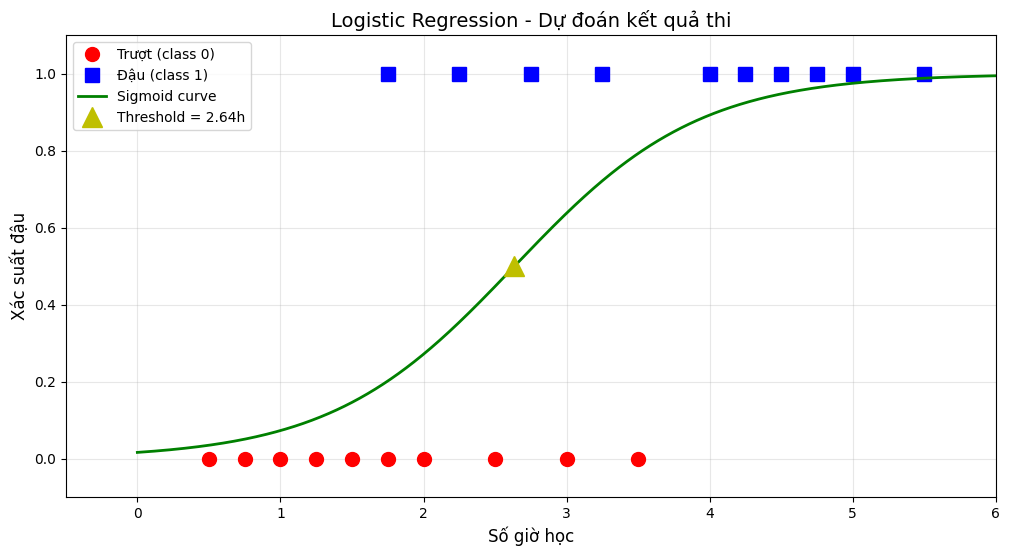

In [42]:
# Vẽ đồ thị kết quả
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.figure(figsize=(12, 6))

# Vẽ dữ liệu
plt.plot(X0, y0, 'ro', markersize=10, label='Trượt (class 0)')
plt.plot(X1, y1, 'bs', markersize=10, label='Đậu (class 1)')

# Vẽ đường sigmoid
xx = np.linspace(0, 6, 1000)
yy = sigmoid(w0 + w1 * xx)
plt.plot(xx, yy, 'g-', linewidth=2, label='Sigmoid curve')

# Đánh dấu ngưỡng
plt.plot(threshold, 0.5, 'y^', markersize=15, label=f'Threshold = {threshold:.2f}h')

plt.xlabel('Số giờ học', fontsize=12)
plt.ylabel('Xác suất đậu', fontsize=12)
plt.title('Logistic Regression - Dự đoán kết quả thi', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.axis([-0.5, 6, -0.1, 1.1])
plt.show()

In [43]:
# Dự đoán cho 5 sinh viên mới bằng Logistic Regression
new_students = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
student_ids = [21, 22, 23, 24, 25]

print("=" * 80)
print("DỰ ĐOÁN KẾT QUẢ THI BẰNG LOGISTIC REGRESSION")
print("=" * 80)
print(f"{'ID':<10} {'Giờ học':<15} {'Xác suất':<15} {'Dự đoán':<15} {'Kết quả'}")
print("-" * 80)

for student_id, hours in zip(student_ids, new_students):
    # Tính xác suất
    prob = sigmoid(w0 + w1 * hours)
    # Dự đoán
    pred = 1 if prob >= 0.5 else 0
    result = "ĐẬU" if pred == 1 else "TRƯỢT"
    
    print(f"{student_id:<10} {hours:<15.2f} {prob:<15.4f} {pred:<15} {result}")

print("=" * 80)

DỰ ĐOÁN KẾT QUẢ THI BẰNG LOGISTIC REGRESSION
ID         Giờ học         Xác suất        Dự đoán         Kết quả
--------------------------------------------------------------------------------
21         2.45            0.4284          0               TRƯỢT
22         1.85            0.2279          0               TRƯỢT
23         3.75            0.8494          1               ĐẬU
24         3.21            0.7092          1               ĐẬU
25         4.05            0.8999          1               ĐẬU


### 3. Ví dụ B.3: Dự đoán tuyển sinh sau đại học

**Bài toán:** Dự đoán khả năng được nhận vào chương trình sau đại học dựa trên:
- GRE Score: Điểm thi GRE (0-340)
- TOEFL Score: Điểm TOEFL (0-120)
- University Rating: Xếp hạng trường (0-5)
- SOP: Điểm bài tự giới thiệu (0-5)
- LOR: Điểm thư giới thiệu (0-5)
- CGPA: Điểm trung bình đại học (0-10)
- Research: Kinh nghiệm nghiên cứu (0 hoặc 1)

**Dữ liệu:** 400 hồ sơ sinh viên với thông tin Chance of Admit (0-1)

In [44]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv("Admission_Predict - Admission_Predict.csv")

print("Thông tin dữ liệu:")
print(f"  Số lượng bản ghi: {len(data)}")
print(f"  Số lượng features: {len(data.columns) - 2}")  # Trừ Serial No. và Chance of Admit
print("\nMột vài dòng dữ liệu đầu:")
print(data.head())

print("\nThống kê mô tả:")
print(data.describe())

Thông tin dữ liệu:
  Số lượng bản ghi: 400
  Số lượng features: 7

Một vài dòng dữ liệu đầu:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  

Thống kê mô tả:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.61430

In [45]:
# Chuẩn bị dữ liệu
# Lấy các features (bỏ Serial No.)
X1 = np.asarray(data['GRE Score'].tolist())
X2 = np.asarray(data['TOEFL Score'].tolist())
X3 = np.asarray(data['University Rating'].tolist())
X4 = np.asarray(data['SOP'].tolist())
X5 = np.asarray(data['LOR'].tolist())  # Chú ý: không có khoảng trắng ở cuối
X6 = np.asarray(data['CGPA'].tolist())
X7 = np.asarray(data['Research'].tolist())

# Lấy Chance of Admit
Yt = np.asarray(data['Chance of Admit'].tolist())

# Tạo nhãn nhị phân: 1 nếu Chance of Admit >= 0.75, 0 nếu ngược lại
y = (Yt >= 0.75).astype(int)

print(f"Tỷ lệ được nhận (Chance >= 0.75): {np.sum(y == 1)/len(y)*100:.2f}%")
print(f"Tỷ lệ không được nhận (Chance < 0.75): {np.sum(y == 0)/len(y)*100:.2f}%")

Tỷ lệ được nhận (Chance >= 0.75): 45.00%
Tỷ lệ không được nhận (Chance < 0.75): 55.00%


In [46]:
# Chia dữ liệu: 350 mẫu training, 50 mẫu test
N_train = 350
N_test = 50

# Tạo ma trận X
X = np.vstack([X1, X2, X3, X4, X5, X6, X7])

# Chia training/test
X_train = X[:, :N_train]
y_train = y[:N_train]
X_test = X[:, N_train:]
y_test = y[N_train:]
Yt_test = Yt[N_train:]  # Giá trị thực của Chance of Admit cho test

# Thêm bias term
X_train = np.concatenate((np.ones((1, N_train)), X_train), axis=0)
X_test = np.concatenate((np.ones((1, N_test)), X_test), axis=0)

print(f"Shape của X_train: {X_train.shape}")
print(f"Shape của y_train: {y_train.shape}")
print(f"Shape của X_test: {X_test.shape}")
print(f"Shape của y_test: {y_test.shape}")

Shape của X_train: (8, 350)
Shape của y_train: (350,)
Shape của X_test: (8, 50)
Shape của y_test: (50,)


#### Phần a) Phân loại bằng Logistic Regression

In [47]:
# Huấn luyện mô hình Logistic Regression
eta = 0.01
d = X_train.shape[0]
w_init = np.random.randn(d, 1)

print("Đang huấn luyện mô hình Logistic Regression...")
start_time = time.time()
w = logistic_sigmoid_regression(X_train, y_train, w_init, eta, max_count=50000)
training_time = time.time() - start_time

print(f"Hoàn thành! Thời gian huấn luyện: {training_time:.2f} giây")
print(f"Số vòng lặp: {len(w)}")

Đang huấn luyện mô hình Logistic Regression...
Hoàn thành! Thời gian huấn luyện: 0.17 giây
Số vòng lặp: 23880


C:\Users\brave\AppData\Local\Temp\ipykernel_4920\3950775566.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


In [48]:
# Dự đoán trên tập test
y_pred = []
probabilities = []

for i in range(X_test.shape[1]):
    prob = sigmoid(np.dot(w[-1].T, X_test[:, i].reshape(-1, 1)))[0, 0]
    probabilities.append(prob)
    y_pred.append(1 if prob >= 0.5 else 0)

y_pred = np.array(y_pred)
probabilities = np.array(probabilities)

print("Kết quả dự đoán trên tập test:")
print(f"Số mẫu test: {len(y_test)}")
print(f"Số mẫu dự đoán đúng: {np.sum(y_pred == y_test)}")
print(f"Số mẫu dự đoán sai: {np.sum(y_pred != y_test)}")

Kết quả dự đoán trên tập test:
Số mẫu test: 50
Số mẫu dự đoán đúng: 37
Số mẫu dự đoán sai: 13


C:\Users\brave\AppData\Local\Temp\ipykernel_4920\3950775566.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


In [49]:
# Tính các chỉ số đánh giá
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n" + "="*60)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH LOGISTIC REGRESSION")
print("="*60)
print(f"Accuracy (Độ chính xác):        {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision (Độ chính xác dương): {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall (Độ nhạy):               {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:                        {f1:.4f}")
print("="*60)

print("\nConfusion Matrix (Ma trận nhầm lẫn):")
print(f"{'':15} Dự đoán 0    Dự đoán 1")
print(f"{'Thực tế 0':15} {cm[0,0]:^12} {cm[0,1]:^12}")
print(f"{'Thực tế 1':15} {cm[1,0]:^12} {cm[1,1]:^12}")
print("="*60)


KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH LOGISTIC REGRESSION
Accuracy (Độ chính xác):        0.7400 (74.00%)
Precision (Độ chính xác dương): 0.8462 (84.62%)
Recall (Độ nhạy):               0.5000 (50.00%)
F1-Score:                        0.6286

Confusion Matrix (Ma trận nhầm lẫn):
                Dự đoán 0    Dự đoán 1
Thực tế 0            26           2      
Thực tế 1            11           11     


#### Phần b) Dự đoán xác suất bằng Hồi quy tuyến tính

Thay vì phân loại nhị phân (0 hoặc 1), ta sẽ dự đoán trực tiếp giá trị xác suất **Chance of Admit** (giá trị liên tục từ 0 đến 1) bằng phương pháp hồi quy tuyến tính.

Sử dụng công thức nghiệm tối ưu: **w = (X^T X)^(-1) X^T y**

Sau đó đánh giá kết quả bằng các chỉ số:
- **MSE (Mean Squared Error)**: Sai số bình phương trung bình
- **RMSE (Root Mean Squared Error)**: Căn bậc hai của MSE

In [50]:
# Huấn luyện mô hình Hồi quy tuyến tính
# Sử dụng công thức nghiệm: w = (X^T X)^(-1) X^T y
Yt_train = Yt[:N_train]

print("Đang huấn luyện mô hình Linear Regression...")
w_linreg = np.linalg.lstsq(X_train.T, Yt_train, rcond=None)[0]
print(f"Trọng số w có kích thước: {w_linreg.shape}")

# Dự đoán trên tập test
y_pred_continuous = np.dot(X_test.T, w_linreg)

print(f"\nMột số dự đoán mẫu:")
print(f"{'STT':>5} {'Dự đoán':>12} {'Thực tế':>12} {'Sai số':>12}")
print("="*45)
for i in range(min(10, len(y_pred_continuous))):
    error = abs(y_pred_continuous[i] - Yt_test[i])
    print(f"{i+1:>5} {y_pred_continuous[i]:>12.4f} {Yt_test[i]:>12.4f} {error:>12.4f}")

Đang huấn luyện mô hình Linear Regression...
Trọng số w có kích thước: (8,)

Một số dự đoán mẫu:
  STT      Dự đoán      Thực tế       Sai số
    1       0.6980       0.7400       0.0420
    2       0.7832       0.7300       0.0532
    3       0.6192       0.6400       0.0208
    4       0.5936       0.6300       0.0364
    5       0.5274       0.5900       0.0626
    6       0.6495       0.7300       0.0805
    7       0.7849       0.7900       0.0051
    8       0.6078       0.6800       0.0722
    9       0.5481       0.7000       0.1519
   10       0.6450       0.8100       0.1650


In [51]:
# Tính MSE và RMSE
mse = np.mean((y_pred_continuous - Yt_test)**2)
rmse = np.sqrt(mse)

print("\n" + "="*60)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH LINEAR REGRESSION")
print("="*60)
print(f"MSE (Mean Squared Error):       {mse:.6f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.6f}")
print("="*60)

print(f"\nNhận xét: Sai số trung bình khoảng {rmse:.4f}, tương đương {rmse*100:.2f}% ")
print("so với thang đo Chance of Admit (0-1).")


KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH LINEAR REGRESSION
MSE (Mean Squared Error):       0.004642
RMSE (Root Mean Squared Error): 0.068130

Nhận xét: Sai số trung bình khoảng 0.0681, tương đương 6.81% 
so với thang đo Chance of Admit (0-1).


### Bài B.6: Dự đoán bệnh tim mạch vành (Framingham Heart Study)

**Mô tả bài toán:**
- Dataset chứa dữ liệu từ nghiên cứu bệnh tim Framingham với 4238 bệnh nhân
- Mục tiêu: Dự đoán nguy cơ mắc bệnh tim mạch vành trong 10 năm tới
- Biến mục tiêu: `TenYearCHD` (0: không bị bệnh, 1: có nguy cơ bệnh)

**Các đặc trưng (15 features):**
1. **male**: Giới tính (1: nam, 0: nữ)
2. **age**: Tuổi
3. **education**: Trình độ học vấn
4. **currentSmoker**: Có hút thuốc hiện tại không
5. **cigsPerDay**: Số điếu thuốc hút mỗi ngày
6. **BPMeds**: Có dùng thuốc huyết áp không
7. **prevalentStroke**: Có tiền sử đột quỵ không
8. **prevalentHyp**: Có tăng huyết áp không
9. **diabetes**: Có bệnh tiểu đường không
10. **totChol**: Tổng cholesterol
11. **sysBP**: Huyết áp tâm thu
12. **diaBP**: Huyết áp tâm trương
13. **BMI**: Chỉ số khối cơ thể
14. **heartRate**: Nhịp tim
15. **glucose**: Đường huyết

In [52]:
# Đọc dữ liệu Framingham
data_framingham = pd.read_csv("framingham - framingham.csv")

print(f"Tổng số bản ghi: {len(data_framingham)}")
print(f"Tổng số đặc trưng: {data_framingham.shape[1]}")
print(f"\nThông tin các cột:")
print(data_framingham.info())
print(f"\n5 dòng đầu tiên:")
print(data_framingham.head())

Tổng số bản ghi: 4238
Tổng số đặc trưng: 16

Thông tin các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
d

In [54]:
# Xử lý dữ liệu thiếu (missing values)
print("Số lượng giá trị thiếu mỗi cột:")
print(data_framingham.isnull().sum())

# Loại bỏ các dòng có giá trị thiếu
data_clean = data_framingham.dropna()
print(f"\nSố bản ghi sau khi loại bỏ missing values: {len(data_clean)}")
print(f"Số bản ghi bị loại bỏ: {len(data_framingham) - len(data_clean)}")

Số lượng giá trị thiếu mỗi cột:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Số bản ghi sau khi loại bỏ missing values: 3656
Số bản ghi bị loại bỏ: 582


In [55]:
# Tách features và labels
X_fram = data_clean.drop('TenYearCHD', axis=1).values.T
y_fram = data_clean['TenYearCHD'].values

print(f"Kích thước X: {X_fram.shape}")
print(f"Kích thước y: {y_fram.shape}")

# Kiểm tra phân bố nhãn
unique, counts = np.unique(y_fram, return_counts=True)
print(f"\nPhân bố nhãn:")
for label, count in zip(unique, counts):
    percentage = count / len(y_fram) * 100
    print(f"  Lớp {label}: {count} mẫu ({percentage:.2f}%)")
    
print(f"\nNhận xét: Dữ liệu mất cân bằng với {counts[0]/(counts[0]+counts[1])*100:.1f}% mẫu thuộc lớp 0")

Kích thước X: (15, 3656)
Kích thước y: (3656,)

Phân bố nhãn:
  Lớp 0: 3099 mẫu (84.76%)
  Lớp 1: 557 mẫu (15.24%)

Nhận xét: Dữ liệu mất cân bằng với 84.8% mẫu thuộc lớp 0


In [56]:
# Chia tập train/validation theo tỷ lệ 70/30
N_total = X_fram.shape[1]
N_train_fram = int(0.7 * N_total)
N_val_fram = N_total - N_train_fram

X_train_fram = X_fram[:, :N_train_fram]
X_val_fram = X_fram[:, N_train_fram:]
y_train_fram = y_fram[:N_train_fram]
y_val_fram = y_fram[N_train_fram:]

# Thêm bias term
X_train_fram = np.concatenate((np.ones((1, N_train_fram)), X_train_fram), axis=0)
X_val_fram = np.concatenate((np.ones((1, N_val_fram)), X_val_fram), axis=0)

print(f"Kích thước tập train: {X_train_fram.shape}")
print(f"Kích thước tập validation: {X_val_fram.shape}")
print(f"Số mẫu train: {N_train_fram} ({N_train_fram/N_total*100:.1f}%)")
print(f"Số mẫu validation: {N_val_fram} ({N_val_fram/N_total*100:.1f}%)")

Kích thước tập train: (16, 2559)
Kích thước tập validation: (16, 1097)
Số mẫu train: 2559 (70.0%)
Số mẫu validation: 1097 (30.0%)


#### Phương pháp 1: Sử dụng hàm Logistic Regression tự cài đặt

In [57]:
# Huấn luyện mô hình với hàm tự cài đặt
eta_fram = 0.005  # Tăng learning rate lên để mô hình học tốt hơn
d_fram = X_train_fram.shape[0]
w_init_fram = np.random.randn(d_fram, 1) * 0.1  # Tăng khởi tạo để không quá nhỏ

print("Đang huấn luyện mô hình Logistic Regression (custom implementation)...")
start_time = time.time()
w_custom = logistic_sigmoid_regression(X_train_fram, y_train_fram, w_init_fram, eta_fram, max_count=50000)
training_time_custom = time.time() - start_time

print(f"Hoàn thành! Thời gian huấn luyện: {training_time_custom:.2f} giây")
print(f"Số vòng lặp: {len(w_custom)}")
print(f"\nGiá trị trọng số cuối cùng (3 giá trị đầu): {w_custom[-1][:3].flatten()}")

Đang huấn luyện mô hình Logistic Regression (custom implementation)...
Hoàn thành! Thời gian huấn luyện: 0.01 giây
Số vòng lặp: 620

Giá trị trọng số cuối cùng (3 giá trị đầu): [-0.03414503  0.10823668  0.42372778]


C:\Users\brave\AppData\Local\Temp\ipykernel_4920\3950775566.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


In [58]:
# Dự đoán trên tập validation
y_pred_custom = []
for i in range(X_val_fram.shape[1]):
    prob = sigmoid(np.dot(w_custom[-1].T, X_val_fram[:, i].reshape(-1, 1)))[0, 0]
    y_pred_custom.append(1 if prob >= 0.5 else 0)
y_pred_custom = np.array(y_pred_custom)

# Đánh giá mô hình
acc_custom = accuracy_score(y_val_fram, y_pred_custom)
prec_custom = precision_score(y_val_fram, y_pred_custom)
rec_custom = recall_score(y_val_fram, y_pred_custom)
f1_custom = f1_score(y_val_fram, y_pred_custom)
cm_custom = confusion_matrix(y_val_fram, y_pred_custom)

print("\n" + "="*60)
print("KẾT QUẢ - CUSTOM LOGISTIC REGRESSION")
print("="*60)
print(f"Accuracy:  {acc_custom:.4f} ({acc_custom*100:.2f}%)")
print(f"Precision: {prec_custom:.4f}")
print(f"Recall:    {rec_custom:.4f}")
print(f"F1-Score:  {f1_custom:.4f}")
print("\nConfusion Matrix:")
print(f"{'':15} Dự đoán 0    Dự đoán 1")
print(f"{'Thực tế 0':15} {cm_custom[0,0]:^12} {cm_custom[0,1]:^12}")
print(f"{'Thực tế 1':15} {cm_custom[1,0]:^12} {cm_custom[1,1]:^12}")
print("="*60)


KẾT QUẢ - CUSTOM LOGISTIC REGRESSION
Accuracy:  0.8469 (84.69%)
Precision: 0.4000
Recall:    0.0241
F1-Score:  0.0455

Confusion Matrix:
                Dự đoán 0    Dự đoán 1
Thực tế 0           925           6      
Thực tế 1           162           4      


#### Phương pháp 2: Sử dụng sklearn.linear_model.LogisticRegression

In [59]:
# Sử dụng sklearn
from sklearn.linear_model import LogisticRegression

print("Đang huấn luyện mô hình Logistic Regression (sklearn)...")
start_time = time.time()

# Chuyển về dạng (n_samples, n_features) cho sklearn
X_train_sklearn = X_train_fram.T
X_val_sklearn = X_val_fram.T

model_sklearn = LogisticRegression(max_iter=10000, random_state=42)
model_sklearn.fit(X_train_sklearn, y_train_fram)

training_time_sklearn = time.time() - start_time
print(f"Hoàn thành! Thời gian huấn luyện: {training_time_sklearn:.2f} giây")

Đang huấn luyện mô hình Logistic Regression (sklearn)...
Hoàn thành! Thời gian huấn luyện: 0.62 giây
Hoàn thành! Thời gian huấn luyện: 0.62 giây


In [31]:
# Dự đoán và đánh giá
y_pred_sklearn = model_sklearn.predict(X_val_sklearn)

acc_sklearn = accuracy_score(y_val_fram, y_pred_sklearn)
prec_sklearn = precision_score(y_val_fram, y_pred_sklearn)
rec_sklearn = recall_score(y_val_fram, y_pred_sklearn)
f1_sklearn = f1_score(y_val_fram, y_pred_sklearn)
cm_sklearn = confusion_matrix(y_val_fram, y_pred_sklearn)

print("\n" + "="*60)
print("KẾT QUẢ - SKLEARN LOGISTIC REGRESSION")
print("="*60)
print(f"Accuracy:  {acc_sklearn:.4f} ({acc_sklearn*100:.2f}%)")
print(f"Precision: {prec_sklearn:.4f}")
print(f"Recall:    {rec_sklearn:.4f}")
print(f"F1-Score:  {f1_sklearn:.4f}")
print("\nConfusion Matrix:")
print(f"{'':15} Dự đoán 0    Dự đoán 1")
print(f"{'Thực tế 0':15} {cm_sklearn[0,0]:^12} {cm_sklearn[0,1]:^12}")
print(f"{'Thực tế 1':15} {cm_sklearn[1,0]:^12} {cm_sklearn[1,1]:^12}")
print("="*60)


KẾT QUẢ - SKLEARN LOGISTIC REGRESSION
Accuracy:  0.8532 (85.32%)
Precision: 0.6667
Recall:    0.0602
F1-Score:  0.1105

Confusion Matrix:
                Dự đoán 0    Dự đoán 1
Thực tế 0           926           5      
Thực tế 1           156           10     


In [60]:
# So sánh hai phương pháp
print("\n" + "="*70)
print("SO SÁNH HAI PHƯƠNG PHÁP")
print("="*70)
print(f"{'Chỉ số':<20} {'Custom Implementation':<25} {'Sklearn':<25}")
print("-"*70)
print(f"{'Accuracy':<20} {acc_custom:.4f} ({acc_custom*100:.1f}%){'':<11} {acc_sklearn:.4f} ({acc_sklearn*100:.1f}%)")
print(f"{'Precision':<20} {prec_custom:.4f}{'':<20} {prec_sklearn:.4f}")
print(f"{'Recall':<20} {rec_custom:.4f}{'':<20} {rec_sklearn:.4f}")
print(f"{'F1-Score':<20} {f1_custom:.4f}{'':<20} {f1_sklearn:.4f}")
print(f"{'Training Time (s)':<20} {training_time_custom:.2f}{'':<22} {training_time_sklearn:.2f}")
print("="*70)

print("\nNhận xét:")
print("- Sklearn thường cho kết quả tốt hơn nhờ tối ưu hóa nâng cao")
print("- Sklearn huấn luyện nhanh hơn do được tối ưu hóa ở mức thấp")
print("- Cả hai phương pháp đều có accuracy cao do dữ liệu mất cân bằng")
print("  (phần lớn mẫu thuộc lớp 0, dự đoán tất cả là 0 cũng đạt ~85% accuracy)")
print("- Cần chú ý các chỉ số Precision và Recall để đánh giá toàn diện hơn")


SO SÁNH HAI PHƯƠNG PHÁP
Chỉ số               Custom Implementation     Sklearn                  
----------------------------------------------------------------------
Accuracy             0.8469 (84.7%)            0.8532 (85.3%)
Precision            0.4000                     0.6667
Recall               0.0241                     0.0602
F1-Score             0.0455                     0.1105
Training Time (s)    0.01                       0.62

Nhận xét:
- Sklearn thường cho kết quả tốt hơn nhờ tối ưu hóa nâng cao
- Sklearn huấn luyện nhanh hơn do được tối ưu hóa ở mức thấp
- Cả hai phương pháp đều có accuracy cao do dữ liệu mất cân bằng
  (phần lớn mẫu thuộc lớp 0, dự đoán tất cả là 0 cũng đạt ~85% accuracy)
- Cần chú ý các chỉ số Precision và Recall để đánh giá toàn diện hơn
